In [1]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

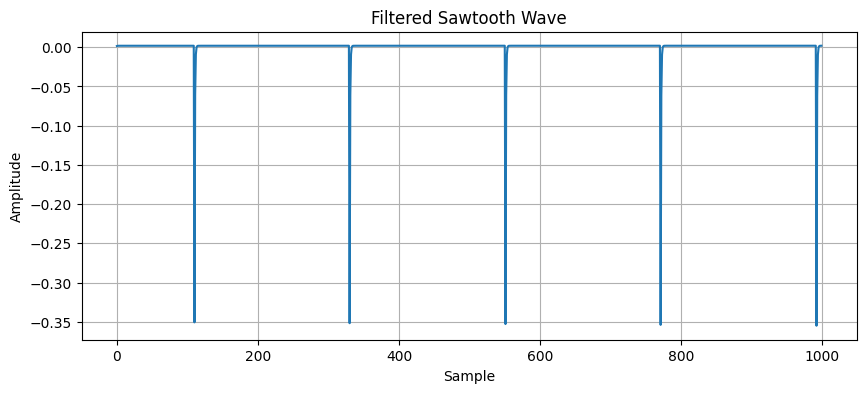

In [6]:
filtered_saw = synth.filter_audio(synth.sawtooth_wave([1], [200], 10), synth.sawtooth_wave([1], [0.4], 10)*1400 + 1500, True)

display(Audio(filtered_saw, rate=44100))
plt.figure(figsize=(10, 4))
plt.plot(filtered_saw[:1000])
plt.title("Filtered Sawtooth Wave")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()